In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from PIL import Image
from sklearn.metrics import f1_score
import tensorflow as tf
import datetime

%load_ext autoreload
%autoreload 2
    
import ml_utils.road_seg as rs
import ml_utils.model as model
import ml_utils.data_augmentation as d_aug

In [2]:
path_data = 'data'
path_train_dir = os.path.join(path_data, 'training')
path_test = os.path.join(path_data, 'test_set_images')
path_models = 'model'

# 2. Model training


In [3]:
import ml_utils.model as model

m = model.Model(model_type='cnn_bn')

conv1_1 size (?, ?, ?, 64)
conv1_2 size (?, ?, ?, 64)
conv1_3 size (?, ?, ?, 64)
pool1 size (?, ?, ?, 64)
conv2_1 size (?, ?, ?, 64)
conv2_2 size (?, ?, ?, 64)
conv2_3 size (?, ?, ?, 64)
pool2 size (?, ?, ?, 64)
conv3_1 size (?, ?, ?, 64)
conv3_2 size (?, ?, ?, 64)
conv3_3 size (?, ?, ?, 64)
pool3 size (?, ?, ?, 64)
conv4_1 size (?, ?, ?, 64)
conv4_2 size (?, ?, ?, 64)
conv4_3 size (?, ?, ?, 64)
pool4 size (?, ?, ?, 64)
conv5_1 size (?, ?, ?, 64)
conv5_2 size (?, ?, ?, 64)
deconv1 size (?, ?, ?, 64)
deconv1_c size (?, ?, ?, 128)
conv6_1 size (?, ?, ?, 96)
conv6_2 size (?, ?, ?, 64)
deconv2 size (?, ?, ?, 64)
deconv2_c size (?, ?, ?, 128)
conv7_1 size (?, ?, ?, 96)
conv7_2 size (?, ?, ?, 64)
deconv3 size (?, ?, ?, 64)
deconv3_c size (?, ?, ?, 128)
conv8_1 size (?, ?, ?, 96)
conv8_2 size (?, ?, ?, 64)
deconv4 size (?, ?, ?, 64)
deconv4_c size (?, ?, ?, 128)
conv9_1 size (?, ?, ?, 96)
conv9_2 size (?, ?, ?, 64)
score size (?, ?, ?, 2)


In [ ]:
m.train_model(path_train_dir, n_epoch=80, display_epoch=5, nmax=10, n_aug=400, n_worst=50)

Max f1 train: 0.9770, valid: 0.9158


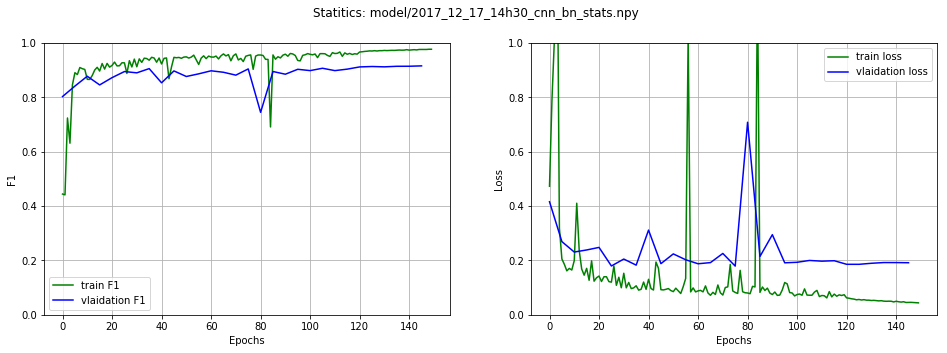

In [24]:
m.plot_stats()

# 3. Results vizualisation


In [45]:
file_save = 'model/2017_12_17_14h30_cnn_bn_model.ckpt'

m = model.Model(model_type='cnn_bn')

conv1_1 size (?, ?, ?, 64)
conv1_2 size (?, ?, ?, 64)
conv1_3 size (?, ?, ?, 64)
pool1 size (?, ?, ?, 64)
conv2_1 size (?, ?, ?, 64)
conv2_2 size (?, ?, ?, 64)
conv2_3 size (?, ?, ?, 64)
pool2 size (?, ?, ?, 64)
conv3_1 size (?, ?, ?, 64)
conv3_2 size (?, ?, ?, 64)
conv3_3 size (?, ?, ?, 64)
pool3 size (?, ?, ?, 64)
conv4_1 size (?, ?, ?, 64)
conv4_2 size (?, ?, ?, 64)
conv4_3 size (?, ?, ?, 64)
pool4 size (?, ?, ?, 64)
conv5_1 size (?, ?, ?, 64)
conv5_2 size (?, ?, ?, 64)
deconv1 size (?, ?, ?, 64)
deconv1_c size (?, ?, ?, 128)
conv6_1 size (?, ?, ?, 96)
conv6_2 size (?, ?, ?, 64)
deconv2 size (?, ?, ?, 64)
deconv2_c size (?, ?, ?, 128)
conv7_1 size (?, ?, ?, 96)
conv7_2 size (?, ?, ?, 64)
deconv3 size (?, ?, ?, 64)
deconv3_c size (?, ?, ?, 128)
conv8_1 size (?, ?, ?, 96)
conv8_2 size (?, ?, ?, 64)
deconv4 size (?, ?, ?, 64)
deconv4_c size (?, ?, ?, 128)
conv9_1 size (?, ?, ?, 96)
conv9_2 size (?, ?, ?, 64)
score size (?, ?, ?, 2)


In [46]:
train_imgs, train_gt, val_imgs, val_gt = m._get_base_sets(ratio=0.8)
train_imgs, _, _ = rs.normalize_data(train_imgs, mode='all', mean_ref = m.mean, std_ref = m.std) 
val_imgs, _, _ = rs.normalize_data(val_imgs, mode='all', mean_ref = m.mean, std_ref = m.std) 

In [42]:
y_pred_train = m.apply_model(train_imgs, file_save)
print('F1-score train: {}'.format(m.predict_f1(train_gt, y_pred_train)))
y_pred_valid = m.apply_model(val_imgs, file_save)
print('F1-score validation: {}'.format(m.predict_f1(val_gt, y_pred_valid)))

INFO:tensorflow:Restoring parameters from model/2017_12_17_14h30_cnn_bn_model.ckpt
F1-score train: 0.9514599949304456
INFO:tensorflow:Restoring parameters from model/2017_12_17_14h30_cnn_bn_model.ckpt
F1-score validation: 0.9158310069838169


In [ ]:
train_imgs, train_gt, val_imgs, val_gt = m._get_base_sets(ratio=0.8)

In [73]:
from sklearn.metrics import f1_score

y_pred = rs.prediction_path_img( np.reshape(y_pred_valid, (20, 400, 400)) )
y_cgt = rs.prediction_path_img(val_gt)
print(f1_score(y_pred.flatten(), y_cgt.flatten(), 'macro'))

0.879500720115


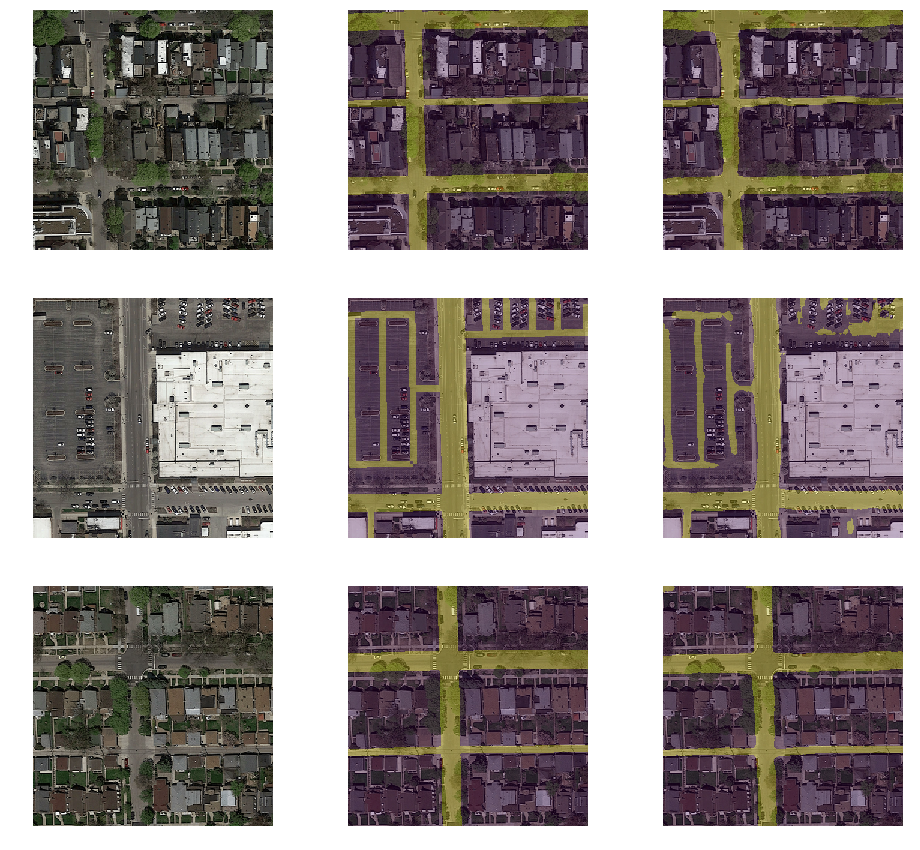

In [47]:
rs.display_predictions(y_pred_train, train_imgs, train_gt)

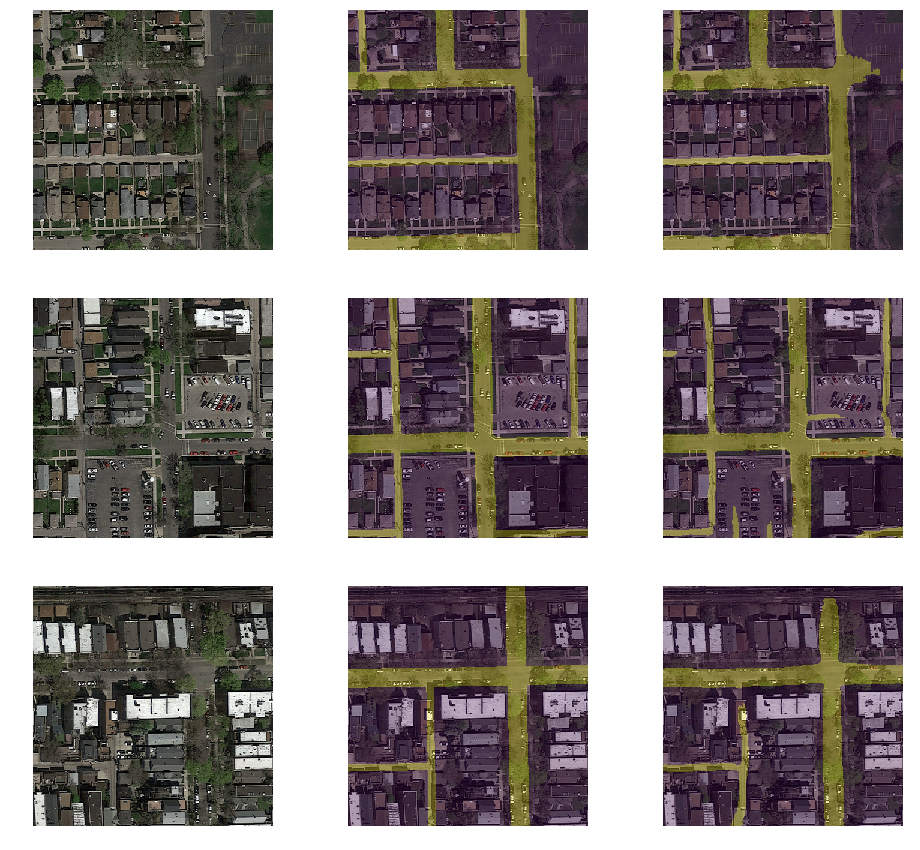

In [48]:
rs.display_predictions(y_pred_valid, val_imgs, val_gt)

# 4. Post Process

In [6]:
test_img = rs.load_test_set(path_test)
test_img_norm, _, _ = rs.normalize_data(test_img, mode='all', mean_ref=m.mean, std_ref=m.std)

In [38]:
# m = model.Model(model_type='cnn_bn', display_log=False)
y_pred_test = m.apply_model(test_img_norm, m.save_path_model)

INFO:tensorflow:Restoring parameters from model/2017_12_17_14h30_cnn_bn_model.ckpt


TypeError: Cannot interpret feed_dict key as Tensor: Tensor Tensor("Placeholder_2:0", shape=(?, ?, ?, 3), dtype=float32) is not an element of this graph.

(50, 608, 608, 3)


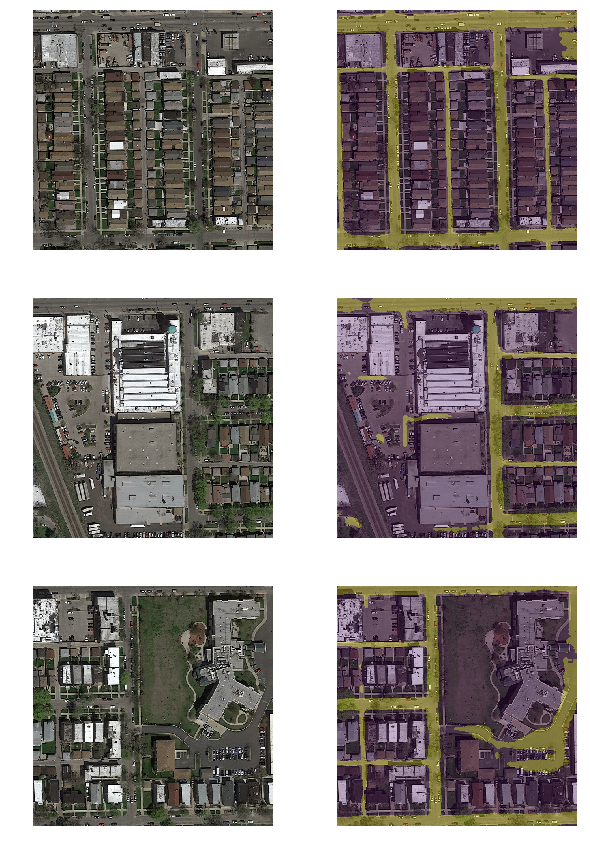

In [8]:
im_pred_test = np.reshape(y_pred_test, test_img.shape[:3]).astype(np.float32)
print(test_img.shape)
rs.display_predictions(y_pred_test, test_img)

In [9]:
import skimage.measure
import skimage.draw
import skimage.morphology

def post_processing(imgs):
    imgs_post = np.zeros(imgs.shape)
    for i in range(imgs.shape[0]):
        imgs_post[i] = skimage.morphology.remove_small_objects(imgs[i].astype(bool), min_size = 200)    
    return imgs_post

im_pred_test_post = post_processing(im_pred_test)

/home/patryk_oleniuk/miniconda3/envs/my-amazing-working-gpu/lib/python3.5/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


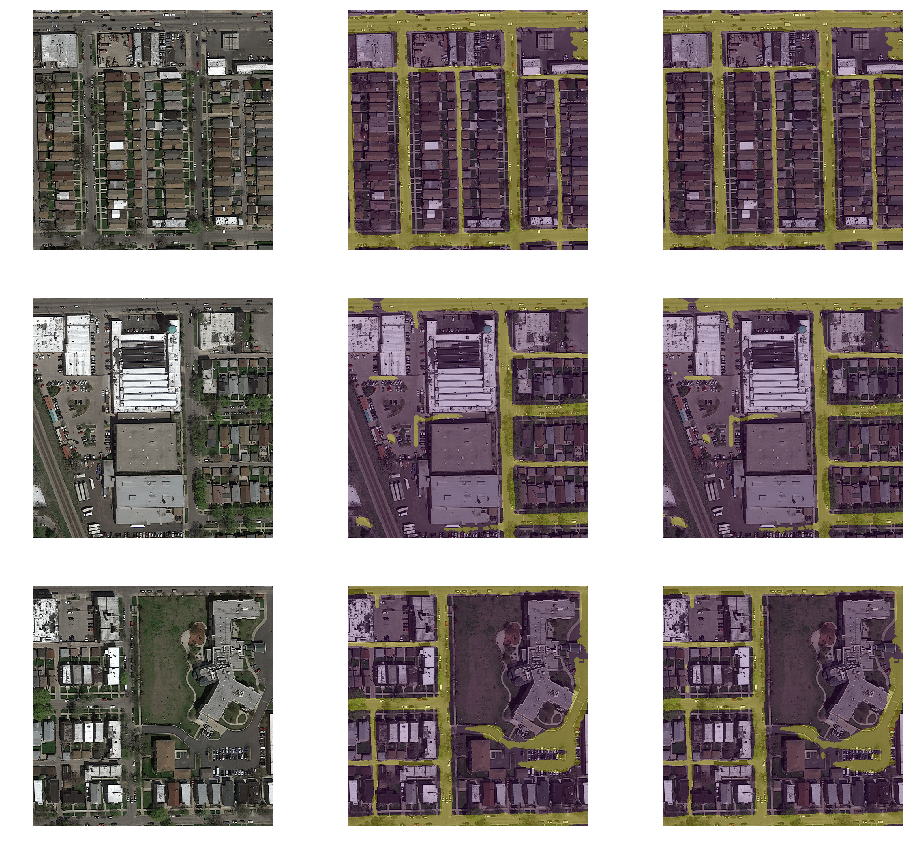

In [10]:
rs.display_predictions(y_pred_test, test_img, im_pred_test_post)

# 4. Submission

In [ ]:
rs.create_submission(im_pred_test_post, 'test_80epoch_post_dataaug_new_dist.csv')

In [ ]:
m = model.Model(model_type='cnn_bn')
m.train_model(path_train_dir, n_epoch=150, display_epoch=5, nmax=10, n_aug=400, n_worst=50)

conv1_1 size (?, ?, ?, 64)
conv1_2 size (?, ?, ?, 64)
conv1_3 size (?, ?, ?, 64)
pool1 size (?, ?, ?, 64)
conv2_1 size (?, ?, ?, 64)
conv2_2 size (?, ?, ?, 64)
conv2_3 size (?, ?, ?, 64)
pool2 size (?, ?, ?, 64)
conv3_1 size (?, ?, ?, 64)
conv3_2 size (?, ?, ?, 64)
conv3_3 size (?, ?, ?, 64)
pool3 size (?, ?, ?, 64)
conv4_1 size (?, ?, ?, 64)
conv4_2 size (?, ?, ?, 64)
conv4_3 size (?, ?, ?, 64)
pool4 size (?, ?, ?, 64)
conv5_1 size (?, ?, ?, 64)
conv5_2 size (?, ?, ?, 64)
deconv1 size (?, ?, ?, 64)
deconv1_c size (?, ?, ?, 128)
conv6_1 size (?, ?, ?, 96)
conv6_2 size (?, ?, ?, 64)
deconv2 size (?, ?, ?, 64)
deconv2_c size (?, ?, ?, 128)
conv7_1 size (?, ?, ?, 96)
conv7_2 size (?, ?, ?, 64)
deconv3 size (?, ?, ?, 64)
deconv3_c size (?, ?, ?, 128)
conv8_1 size (?, ?, ?, 96)
conv8_2 size (?, ?, ?, 64)
deconv4 size (?, ?, ?, 64)
deconv4_c size (?, ?, ?, 128)
conv9_1 size (?, ?, ?, 96)
conv9_2 size (?, ?, ?, 64)
score size (?, ?, ?, 2)
Initialised with 80 image(s) found.
Output directory s

/home/patryk_oleniuk/miniconda3/envs/my-amazing-working-gpu/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Recap epoch 1 is 310.7799s
	 last minibatch, loss :  0.365386 cross entropy :  0.347106 reg term :  0.0182802
	 Train set loss :  0.473025835305 , f1 :  0.444322631794


f1 worst, mean: 0.4053
Initialised with 80 image(s) found.
Output directory set to data/training/images/aug_train/.Initialised with 80 image(s) found.
Output directory set to data/training/groundtruth/aug_train/.
Start train with data shape: (450, 400, 400, 3)


/home/patryk_oleniuk/miniconda3/envs/my-amazing-working-gpu/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Recap epoch 2 is 337.8894s
	 last minibatch, loss :  0.311832 cross entropy :  0.29384 reg term :  0.0179921
	 Train set loss :  0.792420825693 , f1 :  0.441321008085


f1 worst, mean: 0.3962
Initialised with 80 image(s) found.
Output directory set to data/training/images/aug_train/.Initialised with 80 image(s) found.
Output directory set to data/training/groundtruth/aug_train/.
Start train with data shape: (450, 400, 400, 3)
Recap epoch 3 is 334.7937s
	 last minibatch, loss :  0.250817 cross entropy :  0.232947 reg term :  0.01787
	 Train set loss :  1.01973872847 , f1 :  0.724128236138


f1 worst, mean: 0.4991
Initialised with 80 image(s) found.
Output directory set to data/training/images/aug_train/.Initialised with 80 image(s) found.
Output directory set to data/training/groundtruth/aug_train/.
Start train with data shape: (450, 400, 400, 3)
Recap epoch 4 is 333.9045s
	 last minibatch, loss :  0.261477 cross entropy :  0.243727 reg term :  0.0177501
	 Train set loss :  1.5729722499

Output directory set to data/training/images/aug_train/.Initialised with 80 image(s) found.
Output directory set to data/training/groundtruth/aug_train/.
Start train with data shape: (450, 400, 400, 3)
Recap epoch 21 is 334.9942s
	 last minibatch, loss :  0.132016 cross entropy :  0.115682 reg term :  0.016334
	 Train set loss :  0.142553840412 , f1 :  0.917445457799


f1 worst, mean: 0.5389
Initialised with 80 image(s) found.
Output directory set to data/training/images/aug_train/.Initialised with 80 image(s) found.
Output directory set to data/training/groundtruth/aug_train/.
Start train with data shape: (450, 400, 400, 3)
Recap epoch 22 is 335.6354s
	 last minibatch, loss :  0.0813467 cross entropy :  0.0649583 reg term :  0.0163884
	 Train set loss :  0.122588849482 , f1 :  0.929858945581


f1 worst, mean: 0.5531
Initialised with 80 image(s) found.
Output directory set to data/training/images/aug_train/.Initialised with 80 image(s) found.
Output directory set to data/training/groun

Output directory set to data/training/images/aug_train/.Initialised with 80 image(s) found.
Output directory set to data/training/groundtruth/aug_train/.
Start train with data shape: (450, 400, 400, 3)
Recap epoch 40 is 335.5062s
	 last minibatch, loss :  0.088935 cross entropy :  0.072759 reg term :  0.016176
	 Train set loss :  0.0937545888126 , f1 :  0.944786433223
	 Validation set loss :  0.182745248079 , f1 :  0.905745769157


f1 worst, mean: 0.5543
Initialised with 80 image(s) found.
Output directory set to data/training/images/aug_train/.Initialised with 80 image(s) found.
Output directory set to data/training/groundtruth/aug_train/.
Start train with data shape: (450, 400, 400, 3)
Recap epoch 41 is 336.7839s
	 last minibatch, loss :  0.070176 cross entropy :  0.0539553 reg term :  0.0162206
	 Train set loss :  0.130564839269 , f1 :  0.922854989273


f1 worst, mean: 0.5201
Initialised with 80 image(s) found.
Output directory set to data/training/images/aug_train/.Initialised with

Output directory set to data/training/images/aug_train/.Initialised with 80 image(s) found.
Output directory set to data/training/groundtruth/aug_train/.
Start train with data shape: (450, 400, 400, 3)
Recap epoch 77 is 335.4697s
	 last minibatch, loss :  0.0837482 cross entropy :  0.0670229 reg term :  0.0167253
	 Train set loss :  0.0785730126417 , f1 :  0.956147204734


f1 worst, mean: 0.5143
Initialised with 80 image(s) found.
Output directory set to data/training/images/aug_train/.Initialised with 80 image(s) found.
Output directory set to data/training/groundtruth/aug_train/.
Start train with data shape: (450, 400, 400, 3)
Recap epoch 78 is 334.4751s
	 last minibatch, loss :  0.0814673 cross entropy :  0.0638476 reg term :  0.0176197
	 Train set loss :  0.163553255465 , f1 :  0.903136660937


f1 worst, mean: 0.4937
Initialised with 80 image(s) found.
Output directory set to data/training/images/aug_train/.Initialised with 80 image(s) found.
Output directory set to data/training/g

Recap epoch 95 is 331.7623s
	 last minibatch, loss :  0.0999922 cross entropy :  0.0837517 reg term :  0.0162405
	 Train set loss :  0.0911816489365 , f1 :  0.954026854943
	 Validation set loss :  0.29479521513 , f1 :  0.885156136099


f1 worst, mean: 0.5495
Initialised with 80 image(s) found.
Output directory set to data/training/images/aug_train/.Initialised with 80 image(s) found.
Output directory set to data/training/groundtruth/aug_train/.
Start train with data shape: (450, 400, 400, 3)
Recap epoch 96 is 335.1437s
	 last minibatch, loss :  0.0504196 cross entropy :  0.0341549 reg term :  0.0162647
	 Train set loss :  0.118788524345 , f1 :  0.935742750688


f1 worst, mean: 0.5007
Initialised with 80 image(s) found.
Output directory set to data/training/images/aug_train/.Initialised with 80 image(s) found.
Output directory set to data/training/groundtruth/aug_train/.
Start train with data shape: (450, 400, 400, 3)
Recap epoch 97 is 335.7692s
	 last minibatch, loss :  0.0995754 cross

Max f1 train: 0.9770, valid: 0.9158


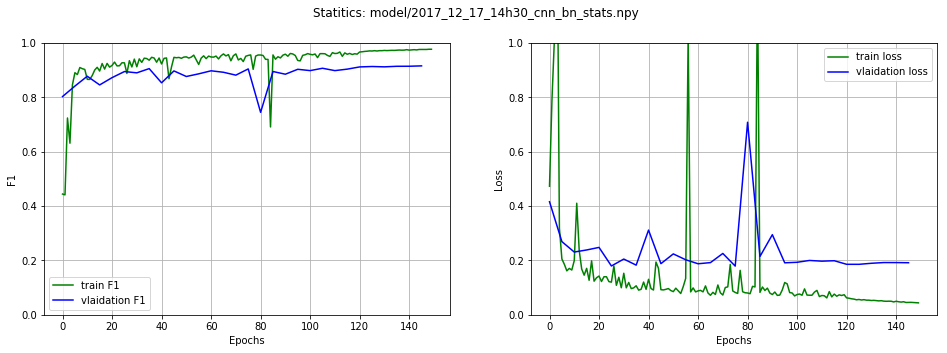

In [16]:
m.plot_stats()

In [39]:
test_img = rs.load_test_set(path_test)
test_img_norm, _, _ = rs.normalize_data(test_img, mode='all', mean_ref=m.mean, std_ref=m.std)

In [40]:
y_pred_test = m.apply_model(test_img_norm, m.save_path_model)

INFO:tensorflow:Restoring parameters from model/2017_12_17_14h30_cnn_bn_model.ckpt


TypeError: Cannot interpret feed_dict key as Tensor: Tensor Tensor("Placeholder_2:0", shape=(?, ?, ?, 3), dtype=float32) is not an element of this graph.

(50, 608, 608, 3)


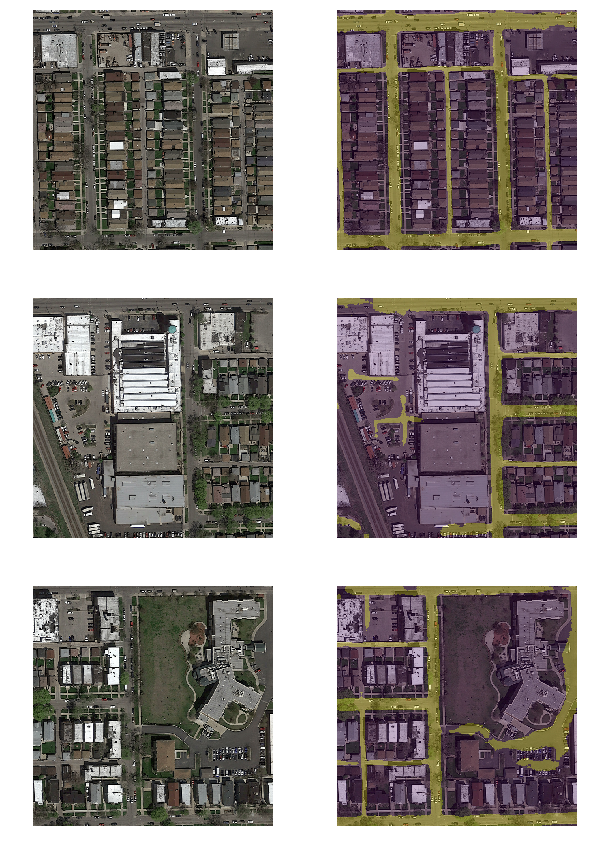

In [19]:
im_pred_test = np.reshape(y_pred_test, test_img.shape[:3]).astype(np.float32)
print(test_img.shape)
rs.display_predictions(y_pred_test, test_img)

In [20]:
im_pred_test_post = post_processing(im_pred_test)

/home/patryk_oleniuk/miniconda3/envs/my-amazing-working-gpu/lib/python3.5/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


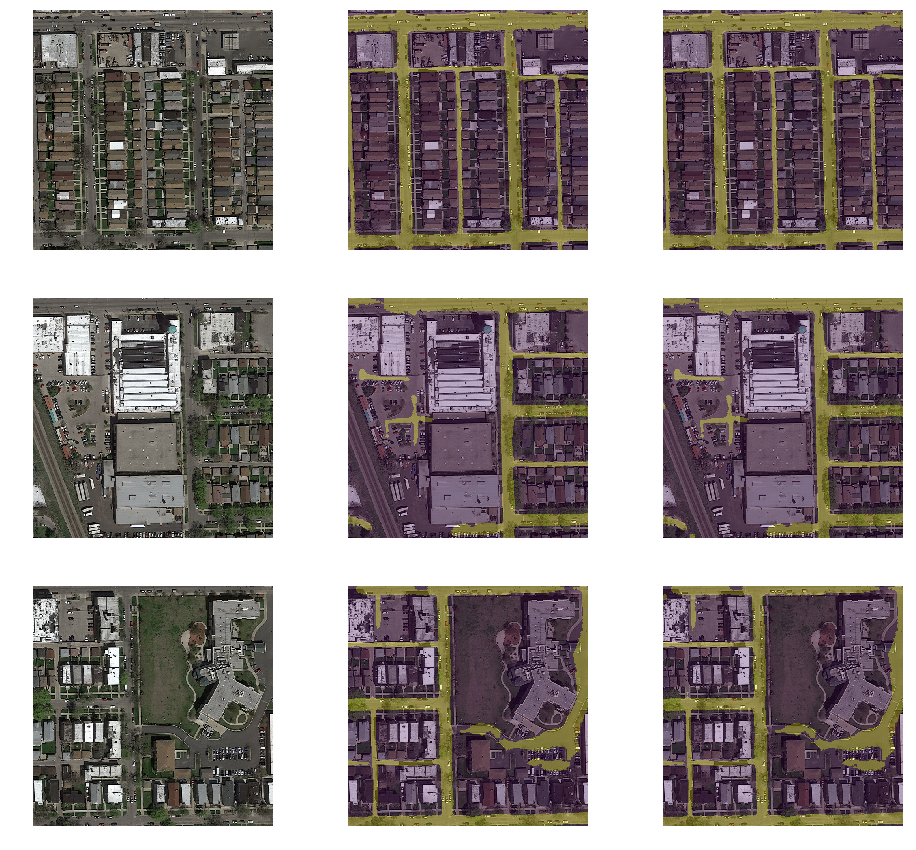

In [21]:
rs.display_predictions(y_pred_test, test_img, im_pred_test_post)

In [22]:
rs.create_submission(im_pred_test_post, 'test_150epoch_post_dataaug_new_dist.csv')

In [23]:
m.save_path_model

'model/2017_12_17_14h30_cnn_bn_model.ckpt'